In [218]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1


**(a)**

Text(0, 0.5, 'f(x) = x ^ 3 + 1')

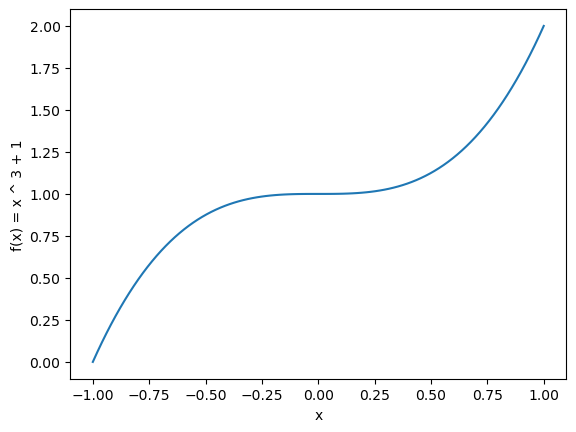

In [219]:
# Define the function
def f(x):
    return x ** 3 + 1

# Generate x values in the specified domain
x = np.linspace(-1, 1, 100)

# Calculate corresponding y values using the function
y = f(x)

# Plot the true function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x) = x ^ 3 + 1')

**(b)**

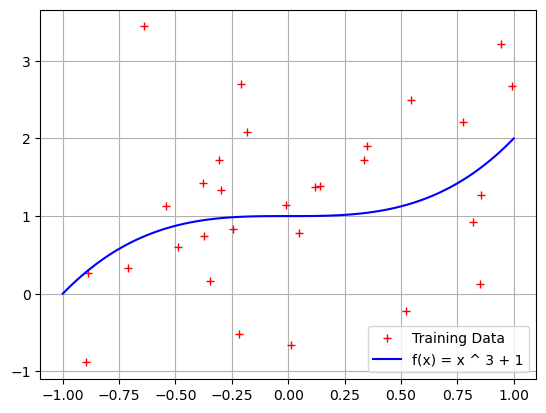

In [220]:
# Create the sample training set
np.random.seed(50)  # for reproducibility

# Generate 30 random x values in the specified domain
train_x = np.random.uniform(low=-1, high=1,size=30) # specify the parameters correctly

# Genearte noise with same size as that of the data.
noise = np.random.normal(size=30) # specify the parameters correctly

# Evaluate the true function at each input value and add Gaussian random noise
train_y = f(train_x) + noise

# Plot the noisy data points (sample training data)
plt.plot(train_x, train_y, '+', color='red', label='Training Data')

# Plot the true function
plt.plot(x, y, label='f(x) = x ^ 3 + 1', color='blue')

# Add labels and legend
plt.legend()
plt.grid(True)
plt.show()

**(c)**

In [221]:
# Perform linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#TODO: Reshape the data for sklearn (if needed)

X = np.array(train_x).reshape(-1, 1)
y = np.array(train_y).reshape(-1, 1)

#TODO: Perform linear regression

reg = LinearRegression()
reg.fit(X, y)

#TODO: Predict y values on training data using the linear model

preds = reg.predict(y)

#TODO: Calculate the sum of squares error

mse_train = mean_squared_error(y, preds)
print(f'Mean Squared Error of Training: {mse_train}')


Mean Squared Error of Training: 0.7148343320145129


**(d)**

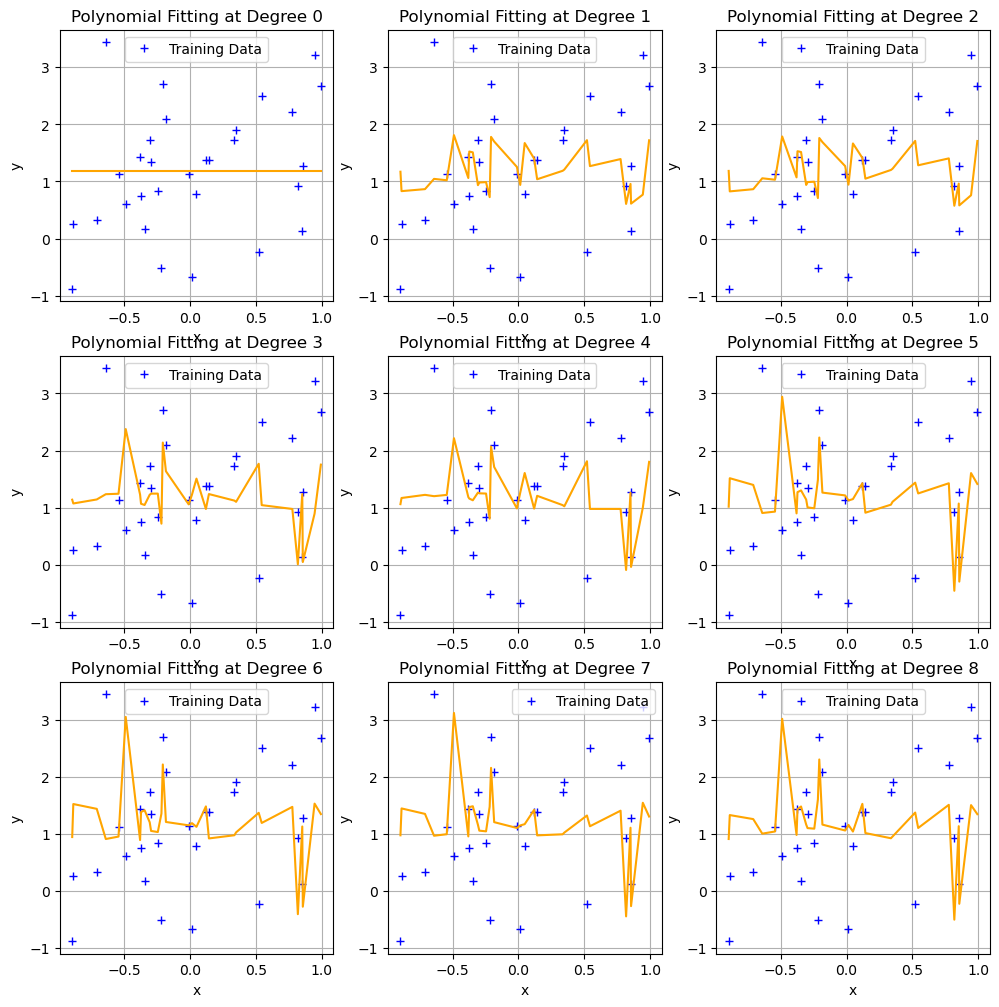

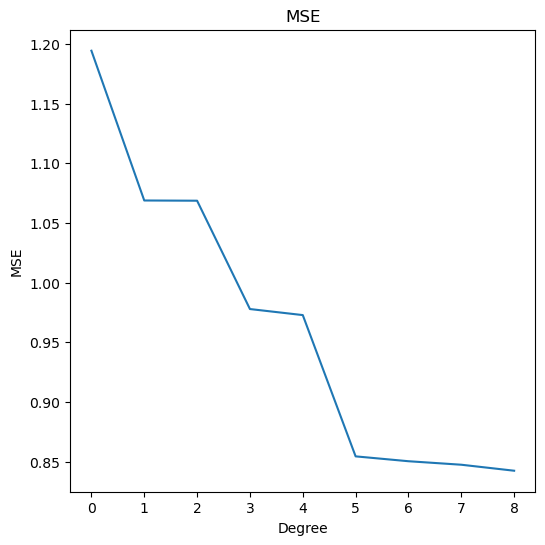

In [222]:
# Perform polynomial regression
from sklearn.preprocessing import PolynomialFeatures

mses = [] # Store MSE for each degree for visualization (optional)

plt.figure(figsize=(12,12))

# Experiment with different polynomial orders
for degree in range(9):
  plt.subplot(3,3,degree+1)

  # Polynomial regression

  poly = PolynomialFeatures(degree=degree)
  X_poly = poly.fit_transform(X)

  # Predict y values using the polynomial model

  reg = LinearRegression()
  reg.fit(X_poly, y)

  # Calculate the sum of squares error

  pred_poly = reg.predict(X_poly)
  mse = mean_squared_error(y, pred_poly)
  mses.append(mse)

  # Plot the polynomial function for current degree

  plt.plot(X, train_y, '+', color='blue', label='Training Data')

  # Plot the true function
  X_poly = np.sort(X.flatten())
  plt.plot(X_poly, pred_poly, linestyle='-', color='orange')

  # Add labels and legend
  plt.legend()
  plt.grid(True)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Polynomial Fitting at Degree {degree}')

# Plot MSE
plt.figure(figsize=(6,6))
plt.plot(np.arange(0, 9, 1), mses)
plt.title('MSE')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.show()

# Q2

**(a)**

In [ ]:
import os

# Load the dataset
path = os.path.join(os.getcwd(), 'W4/pokemonregr.csv')
data = pd.read_csv(path)

print(f"{data.head()}\n")

# Handle missing data - impute/drop/etc. (justify your choices)

# Impute to Capture Data

df_imp = data.copy()

for i in range(data.shape[1]):
    if data.iloc[:, i].dtype == 'object':
        df_imp.iloc[:, i] = data.iloc[:, i].fillna(data.iloc[:, i].mode().iloc[0])
    else:
        df_imp.iloc[:, i] = data.iloc[:, i].fillna(data.iloc[:, i].mean())

print(f"{df_imp.isnull().sum()}\n") # Check if all NAs are dropped

# Define X, y

X = df_imp.drop('weight_kg', axis=1)
y = df_imp['weight_kg']

**(b)**

In [ ]:
# Define linear regression model
reg = LinearRegression()
reg.fit(X, y)

**(c)**

In [225]:
# Print the coefficients of the trained Linear Model
# (hint: look at the documentation of LinearRegression() method in sklearn)

coef_data = dict()

for i in range(len(X.columns)):
    column_data = [reg.coef_[i]]
    coef_data[X.columns[i]] = column_data

coefs = pd.DataFrame(data=coef_data)

coefs.transpose()

# We observe that heigh_m has the largest coefficient value, thereby the most significance.

,0
attack,0.357074
defense,0.551564
height_m,53.843880
sp_attack,0.015288
sp_defense,0.158542
speed,-0.394064


**(e)**

<!-- **(e)** -->

In [226]:
from sklearn.preprocessing import MinMaxScaler

# Normalize features

scaler = MinMaxScaler()

scaler.fit(df_imp)

df_norm = pd.DataFrame(scaler.transform(df_imp), columns=df_imp.columns)

# Define X, y for normalized features

X_norm = df_norm.drop('weight_kg', axis=1)
y_norm = df_norm['weight_kg']

# Define linear regression model

reg_norm = LinearRegression()
reg_norm.fit(X_norm, y_norm)

# What are the coefficients of the new model

coef_data = dict()

for i in range(len(X.columns)):
    column_data = [reg_norm.coef_[i]]
    coef_data[X.columns[i]] = column_data

coefs = pd.DataFrame(data=coef_data)

coefs.transpose()

# normalising the data allows the model to incorporate the influence of all features throughly

,0
attack,0.064286
defense,0.124127
height_m,0.775507
sp_attack,0.002814
sp_defense,0.033300
speed,-0.068975


# Q3

**(a)**

In [227]:
# Library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [228]:
# load dataset
path = os.path.join(os.getcwd(), 'W3/w3classif.csv')
df = pd.read_csv(path, header=None)

# Standardize the features (optional but often recommended for logistic regression)

scaler = StandardScaler()

X = df[df.columns[: -1]]

scaler.fit(X)

# Define X, y
X_norm, y = scaler.transform(X), df[df.columns[-1]]

In [229]:
# Create and fit the logistic regression model

logreg_model = LogisticRegression(random_state=0)
logreg_model.fit(X_norm, y)

# Print the model parameters (coefficients and intercept)
print("Model Coefficients:", logreg_model.coef_)
print("\nModel Intercept:",logreg_model.intercept_)

Model Coefficients: [[2.90589536 3.01711333]]

Model Intercept: [0.60005739]


**(b)**

In [230]:
# Standardize the test data point using the same scaler (if using Standardization above)

x_test = [[1.1, 1.1]]

x_test_norm = scaler.transform(x_test)

# Predict the probability of class 1 for the test data point
probability_y1 = logreg_model.predict_proba(x_test_norm)[0][1]
print("Probability p(y' = 1 | x'):", "%0.5f" % probability_y1)

Probability p(y' = 1 | x'): 0.32756


**(c)**

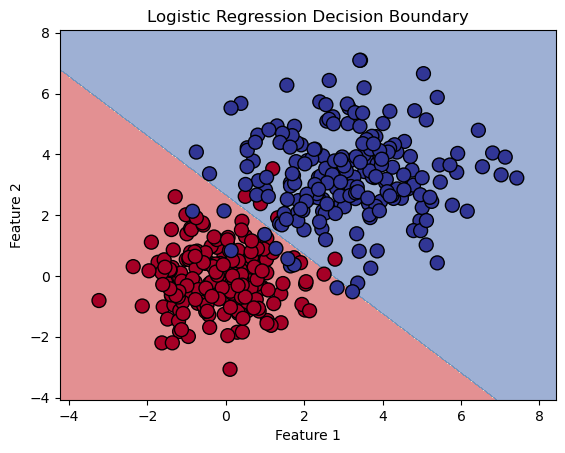

In [232]:
X = X.to_numpy()

# Generate a meshgrid of points for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Standardize the meshgrid points using the same scaler
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_points_scaled = scaler.transform(meshgrid_points)

# Predict the class labels for the meshgrid points

predictions = logreg_model.predict(meshgrid_points_scaled)

predictions = predictions.reshape(xx.shape)

# Reshape the predictions to match the shape of the meshgrid

# Plot the decision boundary and data points
plt.contourf(xx, yy, predictions, cmap='RdYlBu', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', marker='o', s=100)

# Plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')

# Show the plot
plt.show()